# Raindeer: Weather in Germany over the past centuries

## Motivation:
The aim of this project is to provide an intuitive tool to visualize and analyze weather data from all german states in a clear and easy manner while providing more advanced analysis tools for users that want to have a more in-depth look at the topic. For this reason there are several functional modes to the tool that can be selected.

## Setup:

In [16]:
import argparse
from data_helper import *
from dataframe_helper import *
from user_stories import *
import pandas as pd
from typing import List
import argument_preprocessing as argpre
import user_stories
import utilities as utils

## Getting started:
One first things one would want to do when analyzing data is to get the data itself from a desired source, in our case this would be the page of the Deutscher Wetterdienst. The software has  functionality to do just that. For this purpose we use the dataframe_helper function, it takes the arguments:


``data``: takes either a list or string of possible dataset types used by the Dwd.

``interval``: takes either a string or list with the either of following two parameters "monthly" or "annual"

``month_range``: define the months used in dataframe only for interval monthly

``option`` is True or False - Write or read only "w" for write, "r" for df output only.

In practice it works like this:

In [38]:
dataframe_helper(['precipitation', 'sunshine_duration', 'air_temperature_mean'], 'annual', '01', 'w')

['C:\\Users\\timow\\RSE\\Group_Project\\raindeer/data/annual/precipitation', 'C:\\Users\\timow\\RSE\\Group_Project\\raindeer/data/annual/sunshine_duration', 'C:\\Users\\timow\\RSE\\Group_Project\\raindeer/data/annual/air_temperature_mean']


[     Jahr brandenburg/berlin brandenburg baden-wuerttemberg  bayern  hessen  \
 0    1882              673.6       673.0             1255.2  1085.3  1005.1   
 1    1883              500.6       500.3              870.5   832.4   656.8   
 2    1884              635.4       634.3              776.4   797.2   699.4   
 3    1885              550.2       549.7              990.9   830.2   691.8   
 4    1886              509.6       509.2             1063.1   863.9   745.3   
 ..    ...                ...         ...                ...     ...     ...   
 136  2018              390.4       390.3              765.0   757.3   576.4   
 137  2019              505.4       504.6              932.6   860.5   728.8   
 138  2020              511.1       511.4              816.0   861.0   656.5   
 139  2021              600.1       600.6              980.9   962.8   743.1   
 140  2022              434.3       435.0              839.7   817.6   681.1   
 
     mecklenburg-vorpommern niedersach

As we can see this took the desired data from the website of the Dwd and gave us csv tables for all given inputs datasets. This data can now be further processed and used with the other functionalities of the software.

##  Generating the first plot
Now that we have data lets see what we can do with it, for starters, lets just visualize the precipitation in germany for all years that we have data.

['C:\\Users\\timow\\RSE\\Group_Project\\raindeer/data/monthly/precipitation']
A value in the time data is not a number value


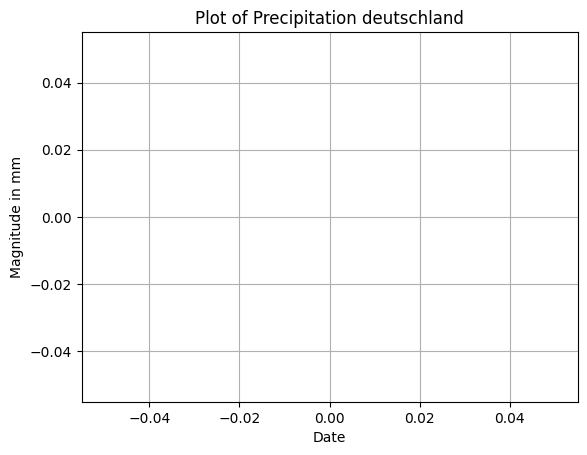

Successfully saved: /results/user_stories/plots/between_years.png


<Figure size 640x480 with 0 Axes>

In [41]:
plot_between_years('precipitation', 'monthly', [198101, 202101], 'deutschland', 'rain', 'simple')

## Plotting multiple weather parameters at once / What are general developments in the weather data?
Next lets look at how we can display multiple weather parameters at once to look at trends and correltation in the data. For this we use the functionality ``plot_weather_parameters_annual``. It lets us plot precipitation, sunshine and temperature at once.

     Jahr.1  Brandenburg/Berlin  Brandenburg  Baden-Wuerttemberg  Bayern  \
Jahr                                                                       
1881   year                7.55         7.54                7.66    6.61   
1882   year                8.99         8.97                8.08    7.33   
1883   year                8.42         8.41                7.77    6.85   
1884   year                9.11         9.10                8.44    7.52   
1885   year                8.40         8.39                7.82    7.04   
...     ...                 ...          ...                 ...     ...   
2018   year               10.84        10.82               10.38    9.89   
2019   year               11.07        11.05                9.87    9.50   
2020   year               10.95        10.94               10.24    9.48   
2021   year                9.67         9.66                8.83    8.31   
2022   year               10.76        10.75               10.59    9.90   

      Hesse

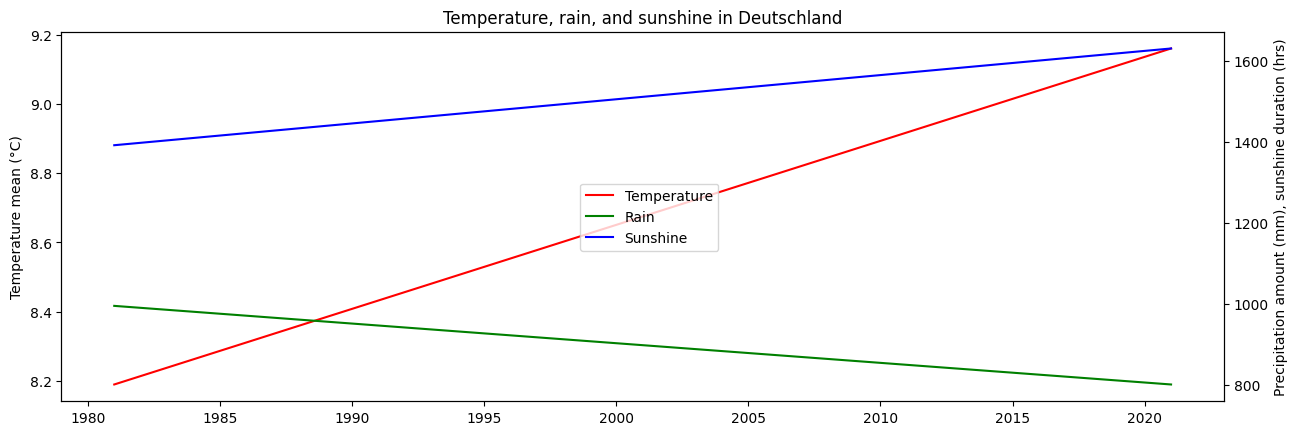

Successfully saved: /results/user_stories/plots/weather_param_annual.png


<Figure size 640x480 with 0 Axes>

In [40]:
plot_weather_parameters_annual([1981, 2021], "Deutschland", f"{parent_dir}/raindeer/data/annual")

## Forecasting weather data
The software allows the user to do simple linear regression forecasting of the current temperature data at hand. This might be useful for short term prediction but is not meant for for time forecasting as a linear regression is not sophisticated enough to do that. To use this functionality we use the function ``predict_temperature_next_year``. It doesn't need any additional input as it uses the full dataset we saved as csv earlier. The result looks like this:

     Jahr.1  Brandenburg/Berlin  Brandenburg  Baden-Wuerttemberg  Bayern  \
Jahr                                                                       
1881   year                7.55         7.54                7.66    6.61   
1882   year                8.99         8.97                8.08    7.33   
1883   year                8.42         8.41                7.77    6.85   
1884   year                9.11         9.10                8.44    7.52   
1885   year                8.40         8.39                7.82    7.04   
...     ...                 ...          ...                 ...     ...   
2018   year               10.84        10.82               10.38    9.89   
2019   year               11.07        11.05                9.87    9.50   
2020   year               10.95        10.94               10.24    9.48   
2021   year                9.67         9.66                8.83    8.31   
2022   year               10.76        10.75               10.59    9.90   

      Hesse

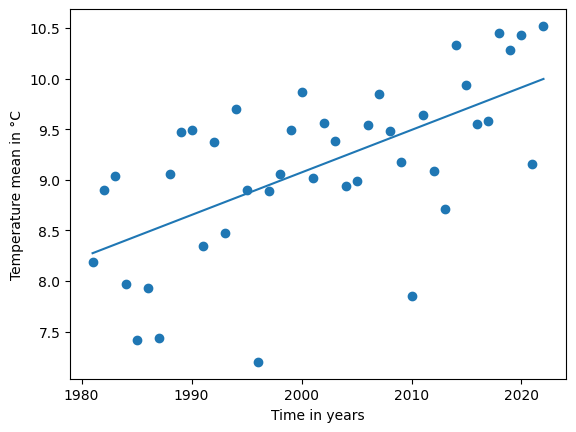

Successfully saved: /results/user_stories/plots/linear_regression.png


10.0

<Figure size 640x480 with 0 Axes>

In [42]:
predict_temperature_next_year()

## Looking for patterns in the weather data
So far we looked at the waether data as a plot of time to find possible patterns or developments and even made a small forecast. We now want to take a different approach to finding patterns in the data, Fourier-Analysis. With Fourier-Analysis we tranform our data from time-basis to frequency-basis, which will show repeating patterns in the data clearly. The function used is ``fourier`` and takes a csv dataframe of choice, it also need to be given the type of weather data used to generate the correct plot handles. Then it does the Fourier-Transformation and displays the frequency data:

['C:\\Users\\timow\\RSE\\Group_Project\\raindeer/data/monthly/air_temperature_mean']


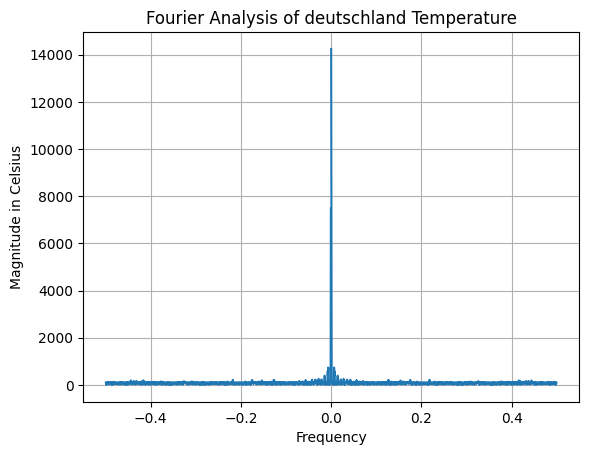

Successfully saved: /results/user_stories/plots/fourier_analysis.png


<Figure size 640x480 with 0 Axes>

In [45]:
fourier_analysis('air_temperature_mean', 'monthly', ['deutschland'], 'temp')

## Summary

## Conclusion

## Commandline Tool Functionality